## **DAILY PHONE USAGE**

**COLUMNS:**


Age

Gender

ScreenTime_Hours

SocialMedia_Usage_Hours

Gaming_Usage_Hours

Messaging_Usage_Hours

Other_Usage_Hours

Usage_Rating

# **TO FIND USER**

**Usage_Rating [Very High, High, Low, Moderate]**

# Step 1: Loading and Understanding the Data

>>**Before applying any machine learning model, we need to load the dataset and understand its structure.**

>>**Understanding the dataset helps you identify potential issues like missing values, categorical variables that need encoding, and feature scaling requirements.**

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/phone_usage_with_output (4).csv')
df.head()

,Age,Gender,ScreenTime_Hours,SocialMedia_Usage_Hours,Gaming_Usage_Hours,Messaging_Usage_Hours,Other_Usage_Hours,Usage_Rating
0,21,Male,5.718798,2.983460,1.209321,1.570299,-0.044281,Moderate
1,18,Male,6.300185,2.645879,2.484710,1.647837,-0.478241,High
2,22,Male,9.961275,3.066623,1.310724,2.295621,3.288308,Very High
3,19,Male,5.192874,2.671564,1.395387,1.392448,-0.266524,Moderate
4,21,Male,6.923206,2.131564,0.704929,1.089932,2.996781,High


In [ ]:
df.tail()

,Age,Gender,ScreenTime_Hours,SocialMedia_Usage_Hours,Gaming_Usage_Hours,Messaging_Usage_Hours,Other_Usage_Hours,Usage_Rating
7545,24,Male,5.081001,2.468030,1.506867,1.398368,-0.292264,Moderate
7546,20,Male,2.028392,1.075926,0.367217,0.230804,0.354446,Low
7547,23,Female,6.907410,1.629158,1.414224,1.143275,2.720753,High
7548,23,Male,2.238175,0.716592,0.890084,0.516196,0.115302,Low
7549,17,Male,6.033188,1.345971,1.755293,1.034789,1.897134,High


In [ ]:
df.shape

(7550, 8)

In [ ]:
df.size

60400

In [ ]:
df.columns

Index(['Age', 'Gender', 'ScreenTime_Hours', 'SocialMedia_Usage_Hours',
       'Gaming_Usage_Hours', 'Messaging_Usage_Hours', 'Other_Usage_Hours',
       'Usage_Rating'],
      dtype='object')

In [ ]:
df.describe()

,Age,ScreenTime_Hours,SocialMedia_Usage_Hours,Gaming_Usage_Hours,Messaging_Usage_Hours,Other_Usage_Hours
count,7550.000000,7550.000000,7550.000000,7550.000000,7550.000000,7550.000000
mean,19.500132,6.020668,2.431626,1.497169,1.200621,0.891252
std,2.879473,2.317863,1.196468,0.802492,0.592513,1.055997
min,15.000000,2.001262,0.419439,0.208329,0.207166,-2.213699
25%,17.000000,4.010594,1.477164,0.856649,0.727757,0.184073
50%,20.000000,6.033301,2.231032,1.338153,1.095207,0.748369
75%,22.000000,8.058107,3.222600,2.023146,1.594372,1.490271
max,24.000000,9.999399,5.935960,3.955096,2.986932,5.088412


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7550 entries, 0 to 7549
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      7550 non-null   int64  
 1   Gender                   7550 non-null   object 
 2   ScreenTime_Hours         7550 non-null   float64
 3   SocialMedia_Usage_Hours  7550 non-null   float64
 4   Gaming_Usage_Hours       7550 non-null   float64
 5   Messaging_Usage_Hours    7550 non-null   float64
 6   Other_Usage_Hours        7550 non-null   float64
 7   Usage_Rating             7550 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 472.0+ KB


# **Step 2: Data Preprocessing**

**Data preprocessing is crucial to prepare the data for machine learning models. It includes:**


>>**Handling Missing Values**

>>**Encoding Categorical Variables**

>>**Feature Scaling**

>>**Splitting Data into Training and Test Sets**


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
ScreenTime_Hours,0
SocialMedia_Usage_Hours,0
Gaming_Usage_Hours,0
Messaging_Usage_Hours,0
Other_Usage_Hours,0
Usage_Rating,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
for i in df.columns:
  print(i,df[i].value_counts())
  print('-'*100)

Age Age
24    782
20    778
15    768
21    761
17    759
19    752
16    746
18    738
23    734
22    732
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Gender Gender
Male      3802
Female    3748
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
ScreenTime_Hours ScreenTime_Hours
5.718798    1
2.569414    1
5.573772    1
5.546288    1
6.720747    1
           ..
4.339564    1
8.112101    1
8.120892    1
4.334586    1
6.033188    1
Name: count, Length: 7550, dtype: int64
----------------------------------------------------------------------------------------------------
SocialMedia_Usage_Hours SocialMedia_Usage_Hours
2.983460    1
1.274029    1
2.464500    1
2.143045    1
3.157417    1
           ..
1.541102    1
3.280164    1
2.145463    1
1.419497    1
1.345971    1
Name: count, Length: 7550, dtype: int64
-----------------------

In [ ]:
for i in df.columns:
  print(i,df[i].unique())
  print('-'*100)

Age [21 18 22 19 24 17 20 16 15 23]
----------------------------------------------------------------------------------------------------
Gender ['Male' 'Female']
----------------------------------------------------------------------------------------------------
ScreenTime_Hours [5.71879843 6.3001848  9.96127528 ... 6.90741009 2.23817526 6.03318792]
----------------------------------------------------------------------------------------------------
SocialMedia_Usage_Hours [2.98346006 2.64587871 3.06662308 ... 1.62915762 0.71659226 1.34597111]
----------------------------------------------------------------------------------------------------
Gaming_Usage_Hours [1.20932055 2.48471034 1.31072371 ... 1.41422399 0.89008425 1.75529328]
----------------------------------------------------------------------------------------------------
Messaging_Usage_Hours [1.5702989  1.64783666 2.29562082 ... 1.1432751  0.51619625 1.03478931]
----------------------------------------------------------------

>>**Converting Categorical Values to Numerical Values**

In [ ]:

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()


In [ ]:
lbft=lb.fit(df['Gender'])
df['Gender']=lbft.transform(df['Gender'])

In [ ]:
lb1=LabelEncoder()
lbft1=lb1.fit(df['Usage_Rating'])
df['Usage_Rating']=lbft1.transform(df['Usage_Rating'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7550 entries, 0 to 7549
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      7550 non-null   int64  
 1   Gender                   7550 non-null   int64  
 2   ScreenTime_Hours         7550 non-null   float64
 3   SocialMedia_Usage_Hours  7550 non-null   float64
 4   Gaming_Usage_Hours       7550 non-null   float64
 5   Messaging_Usage_Hours    7550 non-null   float64
 6   Other_Usage_Hours        7550 non-null   float64
 7   Usage_Rating             7550 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 472.0 KB



































>> **OUTLIERS**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


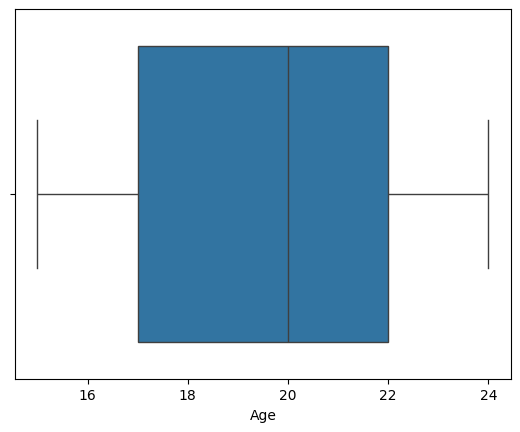

****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


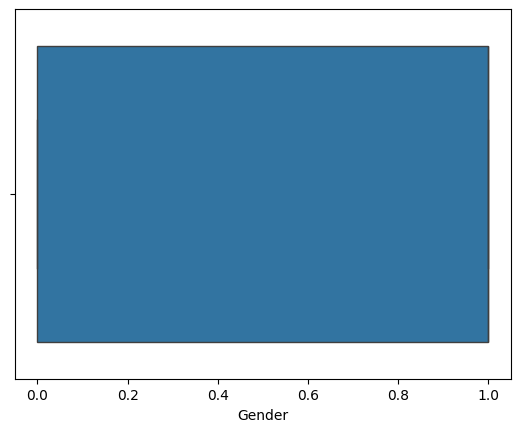

****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


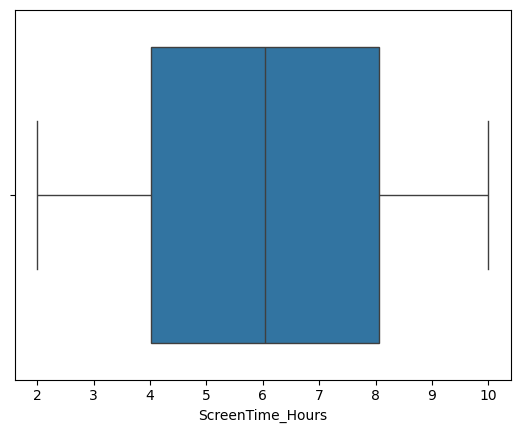

****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


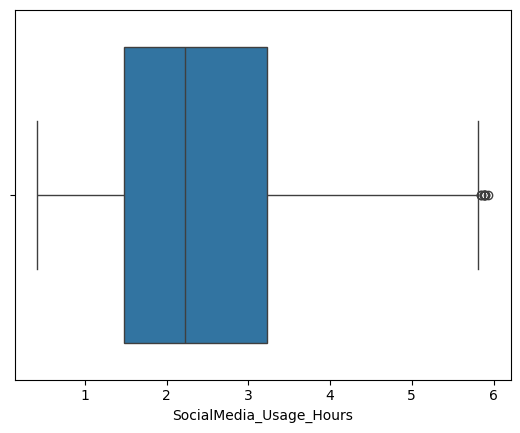

****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


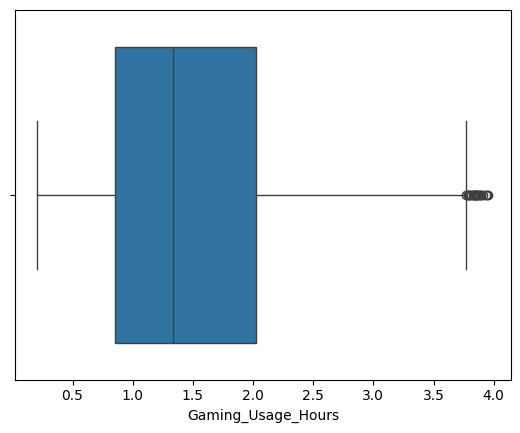

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


****************************************************************************************************


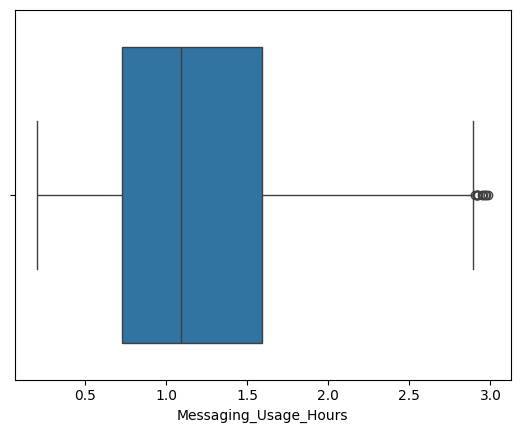

****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


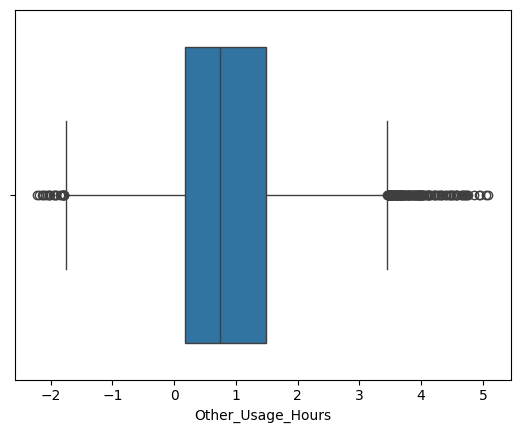

****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


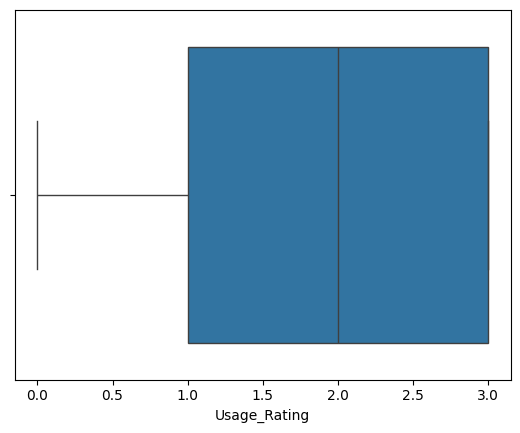

****************************************************************************************************


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns:
  sns.boxplot(x=df[i])
  plt.show()
  print('*'*100)

In [ ]:
import numpy as np
for i in df.columns:
  if df[i].dtype != 'bool':  # Check if the column is not boolean
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    df.loc[df[i]>upper,i]=upper
    df.loc[df[i]<lower,i]=lower

<ipython-input-18-a40e94ccf176>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i]>upper,i]=upper
<ipython-input-18-a40e94ccf176>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i]>upper,i]=upper


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


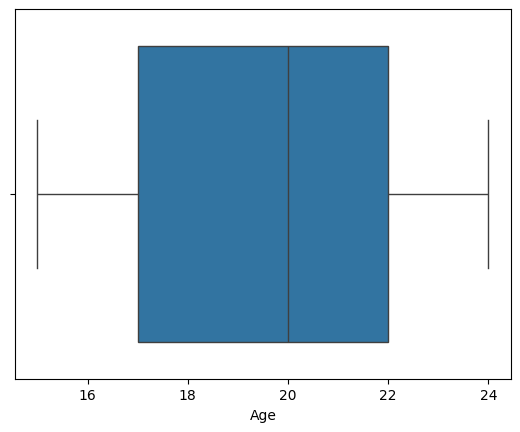

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


****************************************************************************************************


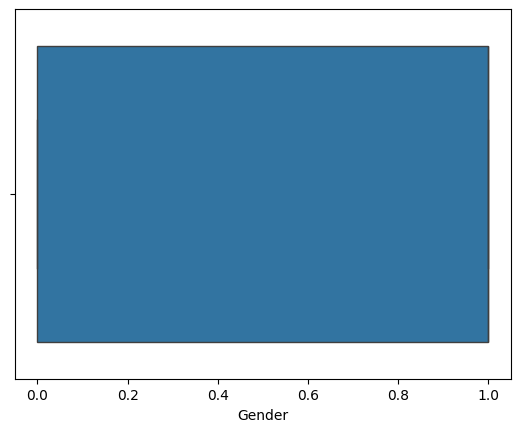

****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


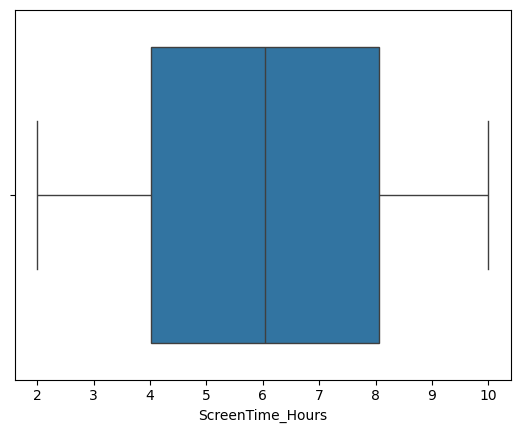

****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


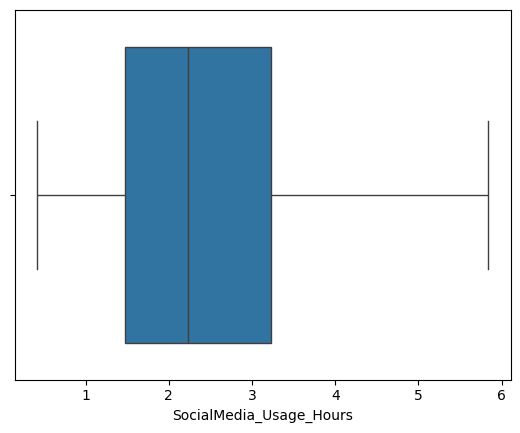

****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


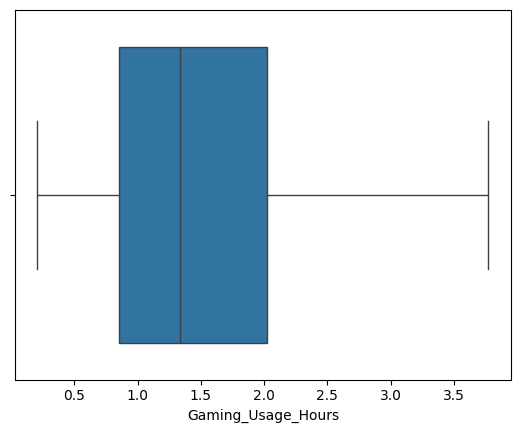

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


****************************************************************************************************


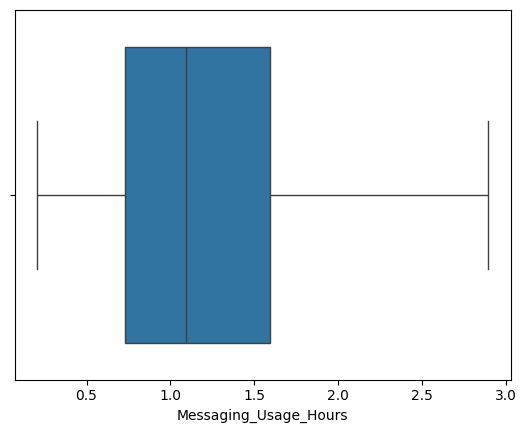

****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


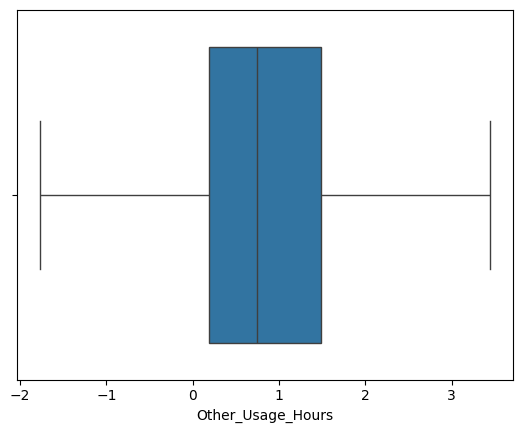

****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


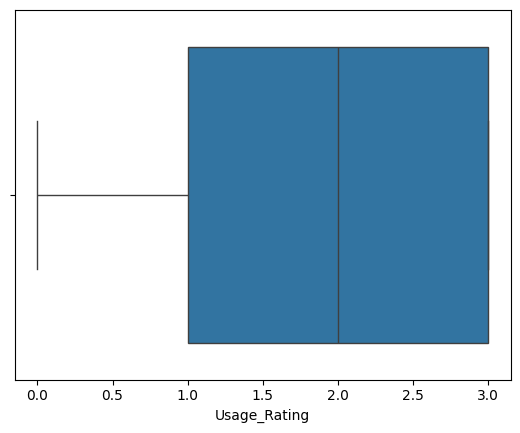

****************************************************************************************************


In [ ]:
for i in df.columns:
  sns.boxplot(x=df[i])
  plt.show()
  print('*'*100)

>>**Correlation With Target Column**

In [ ]:
df.corr()['Usage_Rating']

,Usage_Rating
Age,-0.011027
Gender,-0.014272
ScreenTime_Hours,0.404406
SocialMedia_Usage_Hours,0.319672
Gaming_Usage_Hours,0.292975
Messaging_Usage_Hours,0.326775
Other_Usage_Hours,0.112718
Usage_Rating,1.000000


>>**Splitting the columns as independent variable And Target Column**

In [ ]:
x=df.drop('Usage_Rating',axis=1)
x.head()

,Age,Gender,ScreenTime_Hours,SocialMedia_Usage_Hours,Gaming_Usage_Hours,Messaging_Usage_Hours,Other_Usage_Hours
0,21.0,1.0,5.718798,2.983460,1.209321,1.570299,-0.044281
1,18.0,1.0,6.300185,2.645879,2.484710,1.647837,-0.478241
2,22.0,1.0,9.961275,3.066623,1.310724,2.295621,3.288308
3,19.0,1.0,5.192874,2.671564,1.395387,1.392448,-0.266524
4,21.0,1.0,6.923206,2.131564,0.704929,1.089932,2.996781


In [ ]:
y=df['Usage_Rating']
y.head()

,Usage_Rating
0,2
1,0
2,3
3,2
4,0


# **Train,test,split**

>>**Split the data for Training and Testing Processes**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

NameError: name 'x' is not defined

In [ ]:
ytrain.value_counts()

,count
Usage_Rating,
3,1560
1,1499
2,1498
0,1483


>>**SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
xres,yres=smote.fit_resample(xtrain,ytrain)

In [ ]:
yres.value_counts()

,count
Usage_Rating,
1,1560
3,1560
2,1560
0,1560


>>**Standization**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)
xres=sc.fit_transform(xres)

# **Step 3: Model Selection and Evaluation**

**Now we will evaluate each machine learning model separately. The goal is to understand how each model performs on the dataset using metrics like Accuracy, Precision, Recall, F1-Score**

>>**1. K-Nearest Neighbors (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4,weights='distance')
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
knn_pred=knn.predict(xtest)

In [ ]:
trainscore=knn.score(xtrain,ytrain)
trainscore

1.0

In [ ]:
testscore=knn.score(xtest,ytest)
testscore

0.9198675496688742

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score



In [ ]:
knn_accuracy=accuracy_score(ytest,knn_pred)
print(knn_accuracy)

0.9198675496688742


In [ ]:
print(confusion_matrix(ytest,knn_pred))


[[333   0  19  25]
 [  0 365  13   0]
 [ 26  15 322   0]
 [ 23   0   0 369]]


In [ ]:
print(recall_score(ytest,knn_pred, average='macro')) # it will binary without set average ,this is a multi-classi.so Set average to 'macro', 'micro', or 'weighted'

0.9193191156217354


In [ ]:
print(precision_score(ytest,knn_pred, average='macro'))

0.9196017019012095


In [ ]:
print(classification_report(ytest,knn_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       377
           1       0.96      0.97      0.96       378
           2       0.91      0.89      0.90       363
           3       0.94      0.94      0.94       392

    accuracy                           0.92      1510
   macro avg       0.92      0.92      0.92      1510
weighted avg       0.92      0.92      0.92      1510



**Prediction**

In [ ]:
kdata=knn.predict([[21,1,9.397147,3.908689,1.066860,1.122759,3.298839]])
kdata

array([3])

>>**1.a) KNN by Smotting**

In [ ]:
knn1=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn1.fit(xres,yres)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
ypred1=knn1.predict(xtest)
ypred1

array([2, 2, 1, ..., 0, 3, 0])

In [ ]:
trainscore1=knn1.score(xres,yres)
trainscore1

1.0

In [ ]:
testscore1=knn1.score(xtest,ytest)
testscore1

0.919205298013245

In [ ]:
knn1_accuracy=accuracy_score(ytest,ypred1)
print(knn1_accuracy)

0.919205298013245


In [ ]:
print(confusion_matrix(ytest,ypred1))

[[334   0  23  20]
 [  0 366  12   0]
 [ 21  18 324   0]
 [ 28   0   0 364]]


In [ ]:
print(recall_score(ytest,ypred1, average='macro'))

0.9188322562147013


In [ ]:
print(precision_score(ytest,ypred1, average='macro') )

0.9189028234100866


In [ ]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       377
           1       0.95      0.97      0.96       378
           2       0.90      0.89      0.90       363
           3       0.95      0.93      0.94       392

    accuracy                           0.92      1510
   macro avg       0.92      0.92      0.92      1510
weighted avg       0.92      0.92      0.92      1510



<ipython-input-48-2ad3bedf094b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


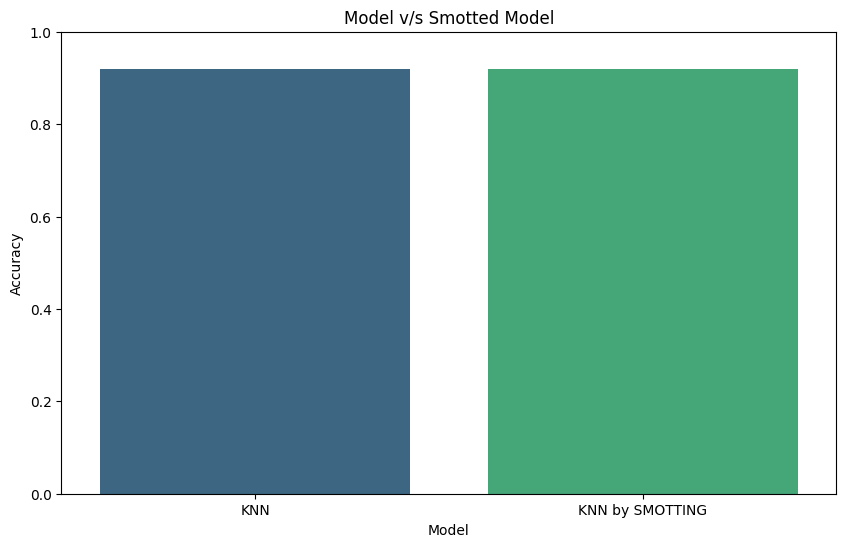

In [ ]:
import matplotlib.pyplot as plt



model_names = ['KNN','KNN by SMOTTING']
accuracies = [knn_accuracy,knn1_accuracy]

# Plot accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model v/s Smotted Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()


>>**2.Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=4,criterion='entropy')  #entropy -represent the order of randomness or measure the purity of split
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
ypred=dt.predict(xtest)

In [ ]:
trainscore=dt.score(xtrain,ytrain)
trainscore

1.0

In [ ]:
testingscore=dt.score(xtest,ytest)
testingscore

0.9940397350993377

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score


In [ ]:
dt_accuracy=accuracy_score(ytest,ypred)
print(dt_accuracy)


0.9940397350993377


In [ ]:
print(recall_score(ytest,ypred, average='macro'))

0.9939109711836984


In [ ]:
print(precision_score(ytest,ypred, average='macro'))

0.993965317751873


In [ ]:
print(confusion_matrix(ytest,ypred))

[[377   0   0   0]
 [  0 374   4   0]
 [  5   0 358   0]
 [  0   0   0 392]]


In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       377
           1       1.00      0.99      0.99       378
           2       0.99      0.99      0.99       363
           3       1.00      1.00      1.00       392

    accuracy                           0.99      1510
   macro avg       0.99      0.99      0.99      1510
weighted avg       0.99      0.99      0.99      1510



[Text(0.5, 0.8333333333333334, 'x[2] <= -0.011\nentropy = 2.0\nsamples = 6040\nvalue = [1483, 1499, 1498, 1560]'),
 Text(0.25, 0.5, 'x[2] <= -0.875\nentropy = 1.0\nsamples = 2997\nvalue = [0.0, 1499.0, 1498.0, 0.0]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 1499\nvalue = [0, 1499, 0, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 1498\nvalue = [0, 0, 1498, 0]'),
 Text(0.75, 0.5, 'x[2] <= 0.854\nentropy = 1.0\nsamples = 3043\nvalue = [1483, 0, 0, 1560]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 1483\nvalue = [1483, 0, 0, 0]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 1560\nvalue = [0, 0, 0, 1560]')]

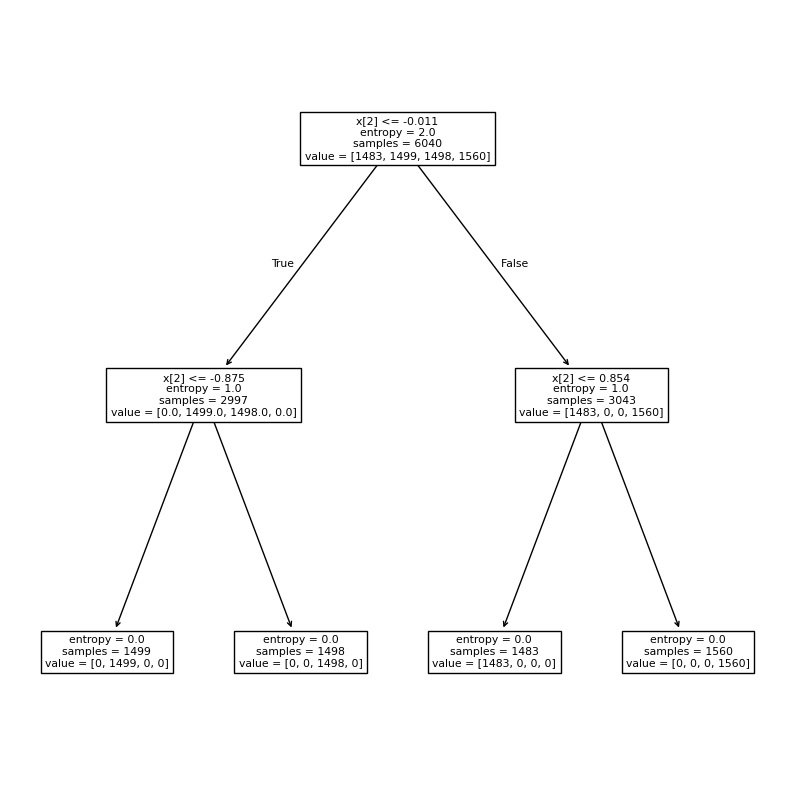

In [ ]:
from  sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(dt)

In [ ]:
x=dt.predict([[21,1,9.397147,3.908689,1.066860,1.122759,3.298839]])
x


array([3])

>>**2.a) Decision Tree By Smotting**

In [ ]:
dt1=DecisionTreeClassifier(max_depth=4,criterion='entropy')
dt1.fit(xres,yres)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
ypre1=dt1.predict(xtest)
ypre1

array([0, 2, 1, ..., 0, 3, 0])

In [ ]:
trainscore1=dt1.score(xres,yres)
trainscore1

1.0

In [ ]:
testingscore1=dt1.score(xtest,ytest)
testingscore1

0.9920529801324504

In [ ]:
print(confusion_matrix(ytest,ypre1))

[[376   0   1   0]
 [  0 376   2   0]
 [  0   0 363   0]
 [  9   0   0 383]]


In [ ]:
dt1_accuracy=accuracy_score(ytest,ypre1)
print(dt1_accuracy)

0.9920529801324504


In [ ]:
print(recall_score(ytest,ypre1, average='macro'))

0.9922743227854065


In [ ]:
print(precision_score(ytest,ypre1, average='macro'))

0.9921066638279753


In [ ]:
print(classification_report(ytest,ypre1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       377
           1       1.00      0.99      1.00       378
           2       0.99      1.00      1.00       363
           3       1.00      0.98      0.99       392

    accuracy                           0.99      1510
   macro avg       0.99      0.99      0.99      1510
weighted avg       0.99      0.99      0.99      1510



[Text(0.5, 0.8333333333333334, 'x[2] <= 0.001\nentropy = 2.0\nsamples = 6240\nvalue = [1560, 1560, 1560, 1560]'),
 Text(0.25, 0.5, 'x[2] <= -0.867\nentropy = 1.0\nsamples = 3120\nvalue = [0, 1560, 1560, 0]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 1560\nvalue = [0, 1560, 0, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 1560\nvalue = [0, 0, 1560, 0]'),
 Text(0.75, 0.5, 'x[2] <= 0.87\nentropy = 1.0\nsamples = 3120\nvalue = [1560, 0, 0, 1560]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 1560\nvalue = [1560, 0, 0, 0]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 1560\nvalue = [0, 0, 0, 1560]')]

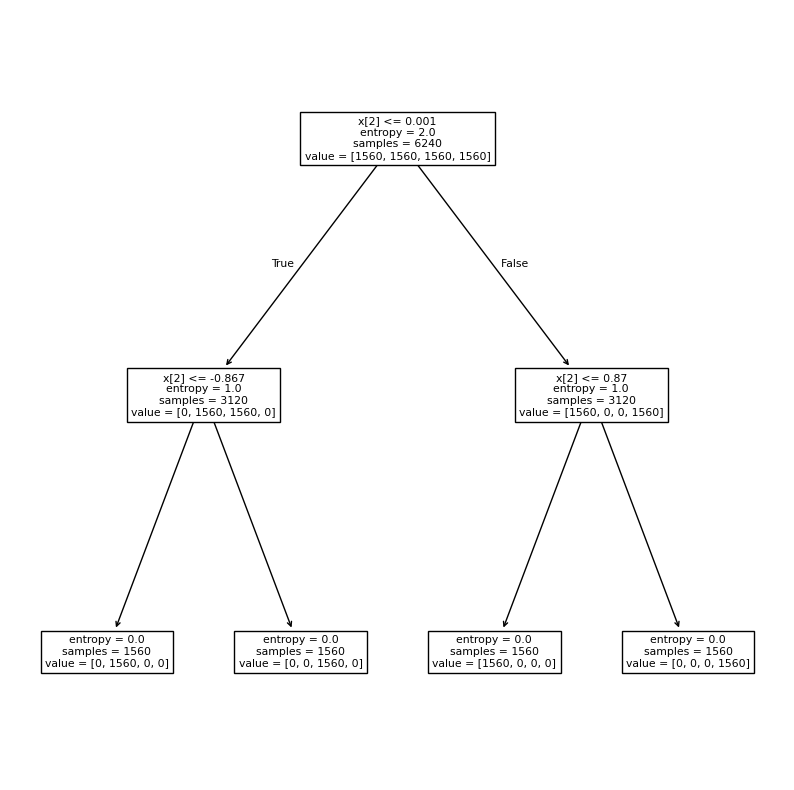

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(dt1)

<ipython-input-71-4c509825fb47>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


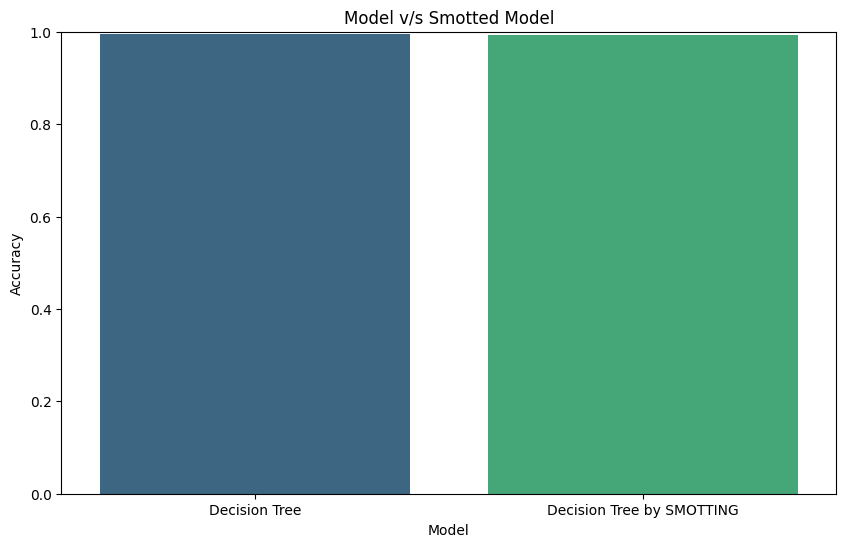

In [ ]:
import matplotlib.pyplot as plt



model_names = ['Decision Tree','Decision Tree by SMOTTING']
accuracies = [dt_accuracy,dt1_accuracy]

# Plot accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model v/s Smotted Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()


>>**3. Naive Bayes - GaussianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(xtrain,ytrain)

GaussianNB()

In [ ]:
testingscore=nb.score(xtest,ytest)
testingscore

0.9410596026490067

In [ ]:
trainingscore=nb.score(xtrain,ytrain)
trainingscore

0.9422185430463577

In [ ]:
nb_pred=nb.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [ ]:
nb_accuracy=accuracy_score(ytest,nb_pred)
print(nb_accuracy)

0.9410596026490067


In [ ]:
print(confusion_matrix(ytest,nb_pred))

[[348   0  15  14]
 [  0 361  17   0]
 [ 20   8 335   0]
 [ 15   0   0 377]]


In [ ]:
print(classification_report(ytest,nb_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       377
           1       0.98      0.96      0.97       378
           2       0.91      0.92      0.92       363
           3       0.96      0.96      0.96       392

    accuracy                           0.94      1510
   macro avg       0.94      0.94      0.94      1510
weighted avg       0.94      0.94      0.94      1510



>>**3.a) Naive Bayes-Guassian By Smotting**

In [ ]:
nb1=GaussianNB()
nb1.fit(xres,yres)

GaussianNB()

In [ ]:
yprr1=nb1.predict(xtest)
yprr1

array([0, 2, 1, ..., 3, 3, 0])

In [ ]:
trainingscore1=nb1.score(xres,yres)
trainingscore1

0.9421474358974359

In [ ]:
testingscore1=nb1.score(xtest,ytest)
testingscore1

0.9456953642384106

In [ ]:
nb1_accuracy=accuracy_score(ytest,yprr1)
print(nb1_accuracy)

0.9456953642384106


In [ ]:
print(confusion_matrix(ytest,yprr1))

[[352   0  18   7]
 [  0 367  11   0]
 [ 16  10 337   0]
 [ 20   0   0 372]]


In [ ]:
print(recall_score(ytest,yprr1, average='macro'))

0.9454851802590272


In [ ]:
print(precision_score(ytest,yprr1, average='macro'))

0.9457466665591723


In [ ]:
print(classification_report(ytest,yprr1))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       377
           1       0.97      0.97      0.97       378
           2       0.92      0.93      0.92       363
           3       0.98      0.95      0.96       392

    accuracy                           0.95      1510
   macro avg       0.95      0.95      0.95      1510
weighted avg       0.95      0.95      0.95      1510



<ipython-input-89-8cdf6f4cf8cf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


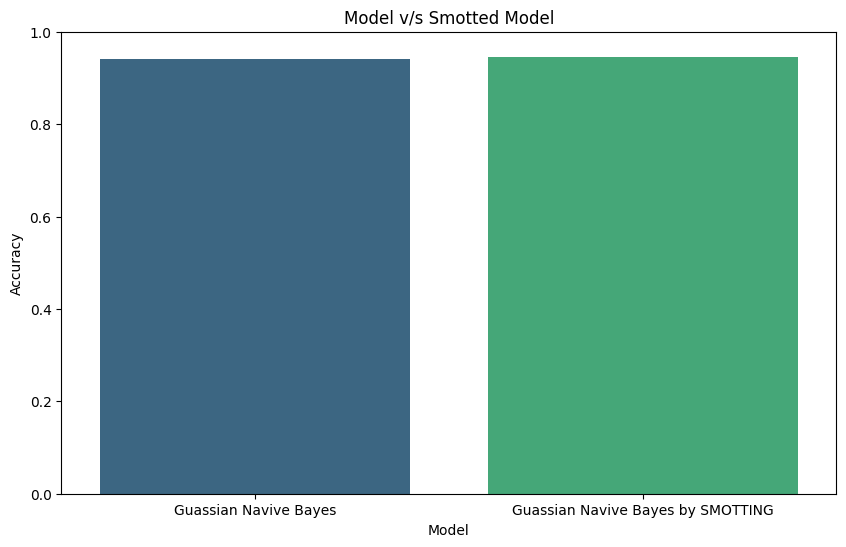

In [ ]:
import matplotlib.pyplot as plt



model_names = ['Guassian Navive Bayes','Guassian Navive Bayes by SMOTTING']
accuracies = [nb_accuracy,nb1_accuracy]

# Plot accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model v/s Smotted Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()


>>**4. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lm = LogisticRegression()
lm.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
ypred = lm.predict(xtest)
ypred

array([0, 2, 1, ..., 0, 3, 0])

In [ ]:
trainingscore = lm.score(xtrain,ytrain)
trainingscore

0.9937086092715232

In [ ]:
testingscore=lm.score(xtest,ytest)
testingscore

0.9933774834437086

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score
cm=confusion_matrix(ytest,ypred)
cm

array([[374,   0,   0,   3],
       [  0, 377,   1,   0],
       [  5,   0, 358,   0],
       [  1,   0,   0, 391]])

In [ ]:
lm_accuracy=accuracy_score(ytest,nb_pred)
print(nb_accuracy)

0.9410596026490067


In [ ]:
print(recall_score(ytest,ypred, average='macro'))

0.9932679531453602


In [ ]:
print(precision_score(ytest,ypred, average='macro'))

0.9934526994493713


In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       377
           1       1.00      1.00      1.00       378
           2       1.00      0.99      0.99       363
           3       0.99      1.00      0.99       392

    accuracy                           0.99      1510
   macro avg       0.99      0.99      0.99      1510
weighted avg       0.99      0.99      0.99      1510



>>**4.a) Logistic Regression By Smotting**

In [ ]:
logr1=LogisticRegression()
logr1.fit(xres,yres)

LogisticRegression()

In [ ]:
ypr1=logr1.predict(xtest)
ypr1

array([0, 2, 1, ..., 0, 3, 0])

In [ ]:
trainingscore1=logr1.score(xres,yres)
trainingscore1

0.9945512820512821

In [ ]:
testingscore1=logr1.score(xtest,ytest)
testingscore1

0.9913907284768212

In [ ]:
print(confusion_matrix(ytest,ypr1))

[[372   0   4   1]
 [  0 378   0   0]
 [  3   0 360   0]
 [  5   0   0 387]]


In [ ]:
lm1_accuracy=accuracy_score(ytest,ypr1)
print(lm1_accuracy)

0.9913907284768212


In [ ]:
print(recall_score(ytest,ypr1, average='macro'))

0.9914294589199426


In [ ]:
print(precision_score(ytest,ypr1, average='macro'))

0.9913452594611032


In [ ]:
print(classification_report(ytest,ypr1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       377
           1       1.00      1.00      1.00       378
           2       0.99      0.99      0.99       363
           3       1.00      0.99      0.99       392

    accuracy                           0.99      1510
   macro avg       0.99      0.99      0.99      1510
weighted avg       0.99      0.99      0.99      1510



<ipython-input-109-ca2167488e18>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


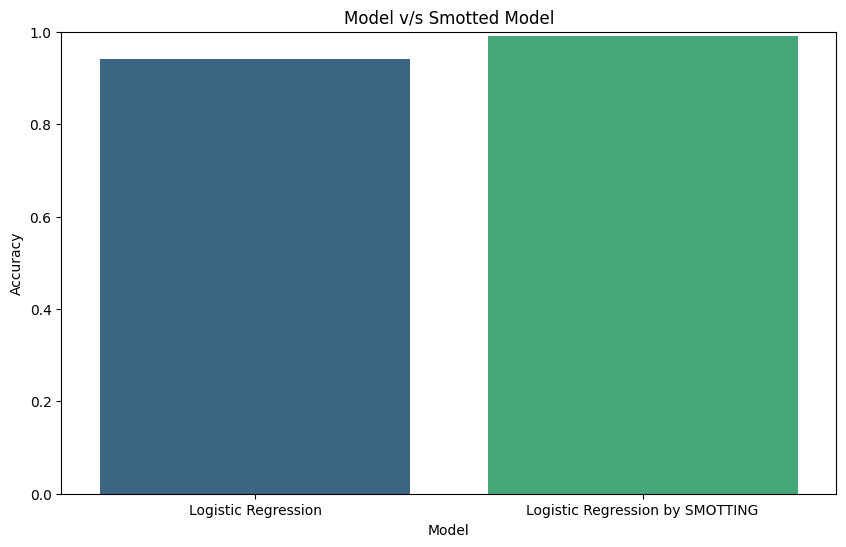

In [ ]:
import matplotlib.pyplot as plt



model_names = ['Logistic Regression','Logistic Regression by SMOTTING']
accuracies = [lm_accuracy,lm1_accuracy]

# Plot accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model v/s Smotted Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()


>>**5. Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(xtrain,ytrain)

SVC(kernel='linear')

In [ ]:
y_pred=model.predict(xtest)

In [ ]:
trainingscore=model.score(xtrain,ytrain)
trainingscore

0.9925496688741722

In [ ]:
testingscore=model.score(xtest,ytest)
testingscore

0.9920529801324504

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,recall_score,precision_score
y_pred=model.predict(xtest)
cm=confusion_matrix(ytest,y_pred)

In [ ]:
print(recall_score(ytest,y_pred, average='macro'))

0.9919434475105098


In [ ]:
print(precision_score(ytest,y_pred, average='macro'))

0.9920611007324769


In [ ]:
print(cm)

[[373   0   1   3]
 [  0 376   2   0]
 [  5   0 358   0]
 [  1   0   0 391]]


In [ ]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       377
           1       1.00      0.99      1.00       378
           2       0.99      0.99      0.99       363
           3       0.99      1.00      0.99       392

    accuracy                           0.99      1510
   macro avg       0.99      0.99      0.99      1510
weighted avg       0.99      0.99      0.99      1510



In [ ]:
model_accuracy=accuracy_score(ytest,y_pred)
print(model_accuracy)

0.9920529801324504


>>**5.a) SVM By Smotting**

In [ ]:
model1=SVC(kernel='linear')
model1.fit(xres,yres)

SVC(kernel='linear')

In [ ]:
y_pred1=model1.predict(xtest)

In [ ]:
trainingscore1=model1.score(xres,yres)
trainingscore1

0.9942307692307693

In [ ]:
testingscore1=model1.score(xtest,ytest)
testingscore1

0.9900662251655629

In [ ]:
print(confusion_matrix(ytest,y_pred1))

[[372   0   3   2]
 [  0 378   0   0]
 [  5   0 358   0]
 [  5   0   0 387]]


In [ ]:
print(recall_score(ytest,y_pred1, average='macro'))

0.9900520484516231


In [ ]:
print(precision_score(ytest,y_pred1, average='macro'))

0.9900925880116274


In [ ]:
model1_accuracy=accuracy_score(ytest,y_pred1)
print(model1_accuracy)

0.9900662251655629


<ipython-input-128-3d0b85bea828>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


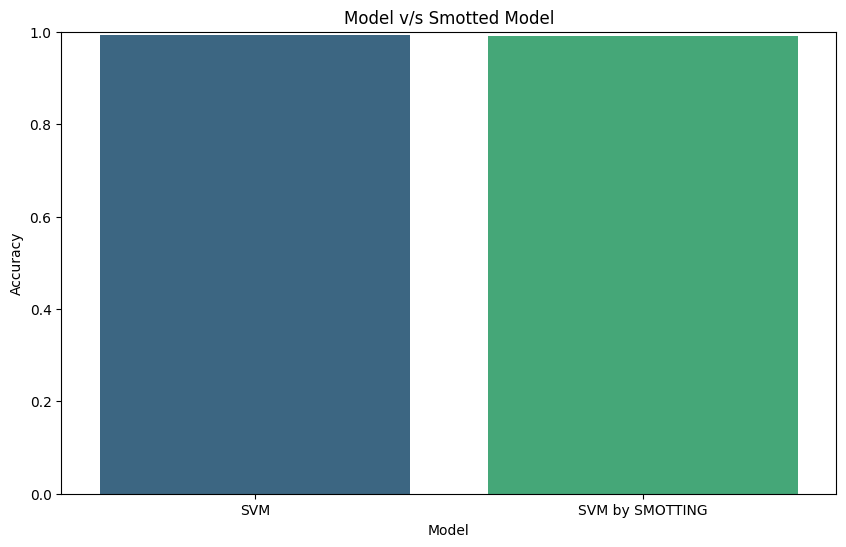

In [ ]:
import matplotlib.pyplot as plt



model_names = ['SVM','SVM by SMOTTING']
accuracies = [model_accuracy,model1_accuracy]

# Plot accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model v/s Smotted Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()


>>**6. Bagging**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
ypred=rf.predict(xtest)

In [ ]:
trainingscore=rf.score(xtrain,ytrain)
trainingscore

1.0

In [ ]:
testingscore=rf.score(xtest,ytest)
testingscore

0.9940397350993377

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score

In [ ]:
print(confusion_matrix(ytest,ypred))

[[377   0   0   0]
 [  0 374   4   0]
 [  5   0 358   0]
 [  0   0   0 392]]


In [ ]:
rf_accuracy=accuracy_score(ytest,ypred)
print(rf_accuracy)

0.9940397350993377


In [ ]:
print(recall_score(ytest,ypred, average='macro'))

0.9939109711836984


In [ ]:
print(precision_score(ytest,ypred, average='macro'))

0.993965317751873


In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       377
           1       1.00      0.99      0.99       378
           2       0.99      0.99      0.99       363
           3       1.00      1.00      1.00       392

    accuracy                           0.99      1510
   macro avg       0.99      0.99      0.99      1510
weighted avg       0.99      0.99      0.99      1510



>>**6.a) Bagging By Smotting**

In [ ]:
rf1=RandomForestClassifier()
rf1.fit(xres,yres)

RandomForestClassifier()

In [ ]:
ypred1=rf1.predict(xtest)

In [ ]:
trainingscore1=rf1.score(xres,yres)
trainingscore1

1.0

In [ ]:
testingscore1=rf1.score(xtest,ytest)
testingscore1

0.9933774834437086

In [ ]:
print(confusion_matrix(ytest,ypred1))

[[377   0   0   0]
 [  0 376   2   0]
 [  0   0 363   0]
 [  8   0   0 384]]


In [ ]:
rf1_accuracy=accuracy_score(ytest,ypred1)
print(rf1_accuracy)

0.9933774834437086


In [ ]:
print(recall_score(ytest,ypred1, average='macro'))

0.9935752078609221


In [ ]:
print(precision_score(ytest,ypred1, average='macro'))

0.9934353317914961


In [ ]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       377
           1       1.00      0.99      1.00       378
           2       0.99      1.00      1.00       363
           3       1.00      0.98      0.99       392

    accuracy                           0.99      1510
   macro avg       0.99      0.99      0.99      1510
weighted avg       0.99      0.99      0.99      1510



<ipython-input-148-51e294f3d356>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


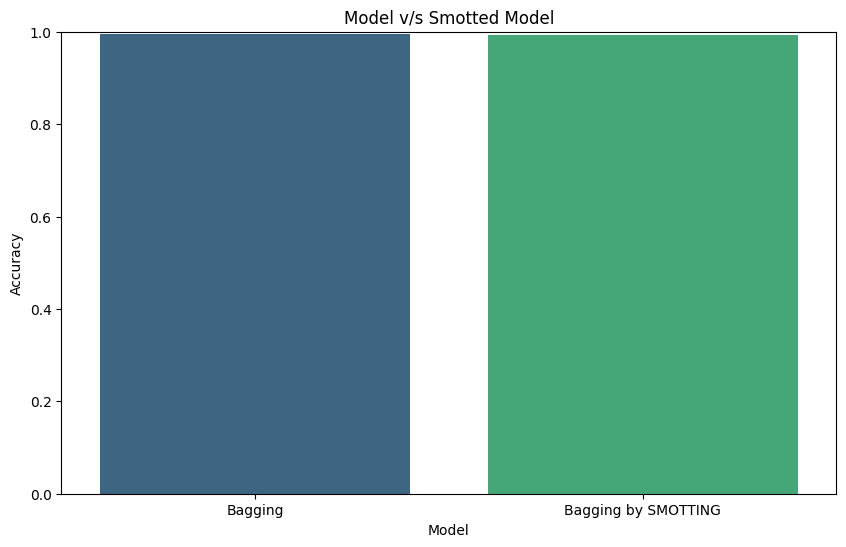

In [ ]:
import matplotlib.pyplot as plt



model_names = ['Bagging','Bagging by SMOTTING']
accuracies = [rf_accuracy,rf1_accuracy]

# Plot accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model v/s Smotted Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()


>>**7. Boosting**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(n_estimators=10)
adb.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=10)

In [ ]:
ypred=adb.predict(xtest)

In [ ]:
testingscore=adb.score(xtest,ytest)
testingscore

0.747682119205298

In [ ]:
trainingscore=adb.score(xtrain,ytrain)
trainingscore

0.7544701986754967

In [ ]:
adb_accuracy=accuracy_score(ytest,ypred)
print(adb_accuracy)

0.747682119205298


In [ ]:
print(confusion_matrix(ytest,ypred))

[[  0   0 377   0]
 [  0 374   4   0]
 [  0   0 363   0]
 [  0   0   0 392]]


In [ ]:
print(recall_score(ytest,ypred, average='macro'))

0.7473544973544973


In [ ]:
print(precision_score(ytest,ypred, average='macro'))

0.6219758064516129


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       377
           1       1.00      0.99      0.99       378
           2       0.49      1.00      0.66       363
           3       1.00      1.00      1.00       392

    accuracy                           0.75      1510
   macro avg       0.62      0.75      0.66      1510
weighted avg       0.63      0.75      0.67      1510



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


>>**7. a) Boosting By Smotting**

In [ ]:
adb1=AdaBoostClassifier(n_estimators=10)
adb1.fit(xres,yres)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=10)

In [ ]:
ypred1=adb1.predict(xtest)

In [ ]:
testingscore1=adb1.score(xtest,ytest)
testingscore1

0.752317880794702

In [ ]:
trainingscore1=adb1.score(xres,yres)
trainingscore1

0.75

In [ ]:
print(confusion_matrix(ytest,ypred1))

[[377   0   0   0]
 [  2 376   0   0]
 [363   0   0   0]
 [  9   0   0 383]]


In [ ]:
print(recall_score(ytest,ypred1, average='macro'))

0.7429374527588813


In [ ]:
print(precision_score(ytest,ypred1, average='macro'))

0.6254993342210386


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
adb1_accuracy=accuracy_score(ytest,ypred1)
print(adb1_accuracy)

0.752317880794702


In [ ]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       377
           1       1.00      0.99      1.00       378
           2       0.00      0.00      0.00       363
           3       1.00      0.98      0.99       392

    accuracy                           0.75      1510
   macro avg       0.63      0.74      0.66      1510
weighted avg       0.64      0.75      0.67      1510



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-167-43465d10add7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


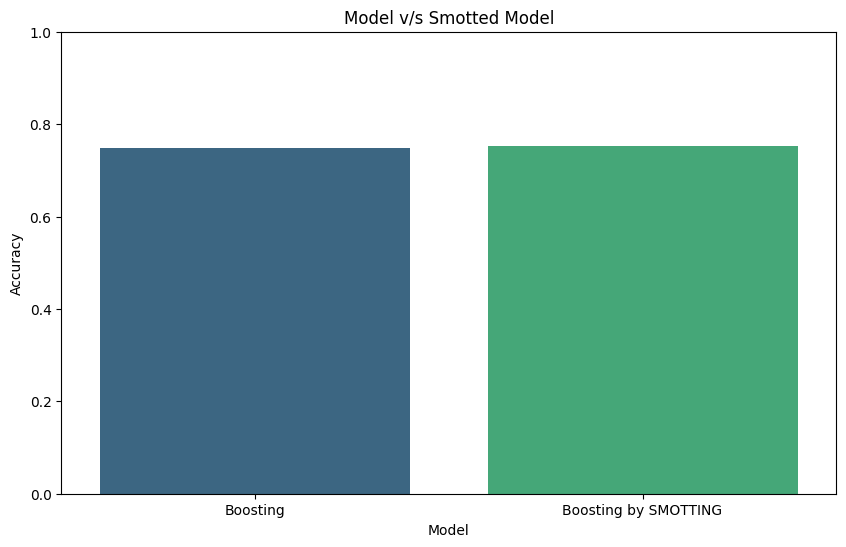

In [ ]:
import matplotlib.pyplot as plt



model_names = ['Boosting','Boosting by SMOTTING']
accuracies = [adb_accuracy,adb1_accuracy]

# Plot accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model v/s Smotted Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()


**FINDING BEST MODEL **

<ipython-input-168-714cbf21453f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1

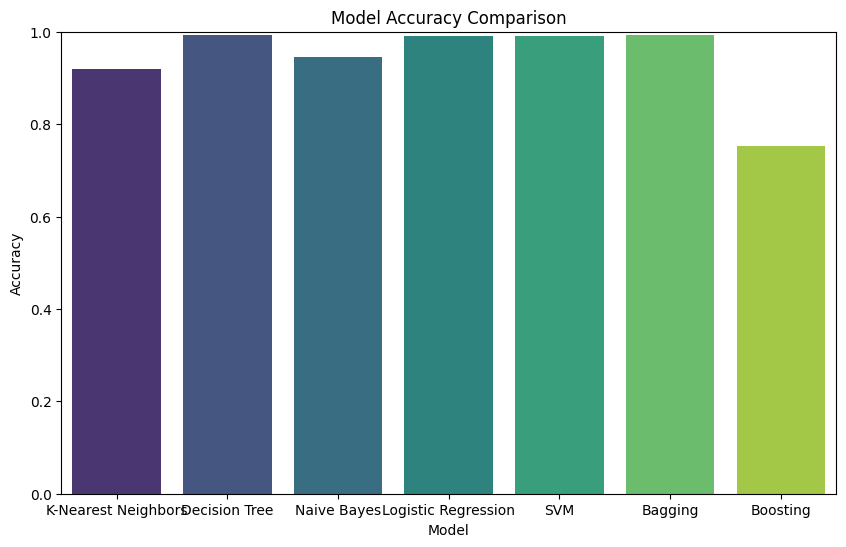

In [ ]:
import matplotlib.pyplot as plt



model_names = ['K-Nearest Neighbors', 'Decision Tree', 'Naive Bayes','Logistic Regression','SVM','Bagging','Boosting']
accuracies = [knn1_accuracy, dt1_accuracy, nb1_accuracy,lm1_accuracy,model1_accuracy,rf1_accuracy,adb1_accuracy]

# Plot accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()


>>**From the above Barplot we can see that both DECISION TREE  and BAGGING has almost same accuracy....**

>>**so based on the testing and training score .......decision tree is much better**

>>**GRIDSEARCH**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt2=DecisionTreeClassifier(max_depth=4,criterion='entropy')  #entropy -represent the order of randomness or measure the purity of split
dt2.fit(xtrain,ytrain)

# Updated param_grid with parameters relevant to Decision Trees
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

gd= GridSearchCV(estimator=dt2,param_grid=param_grid, cv=5, scoring='accuracy')
gd.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
gd.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

>>model based on gd

In [ ]:
modelgd=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2)
modelgd.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5)

In [ ]:
modelgd_accuracy=accuracy_score(ytest,y_pred)
modelgd_accuracy

0.9920529801324504

In [ ]:
testingscore=modelgd.score(xtest,ytest)
testingscore

0.9940397350993377

In [ ]:
trainingscore=modelgd.score(xtrain,ytrain)
trainingscore

1.0

In [ ]:
print(confusion_matrix(ytest,y_pred))

[[373   0   1   3]
 [  0 376   2   0]
 [  5   0 358   0]
 [  1   0   0 391]]


In [ ]:
print(recall_score(ytest,y_pred, average='macro'))

0.9919434475105098


In [ ]:
print(precision_score(ytest,y_pred, average='macro'))

0.9920611007324769


In [ ]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       377
           1       1.00      0.99      1.00       378
           2       0.99      0.99      0.99       363
           3       0.99      1.00      0.99       392

    accuracy                           0.99      1510
   macro avg       0.99      0.99      0.99      1510
weighted avg       0.99      0.99      0.99      1510



<ipython-input-180-5ab927ee7cd7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


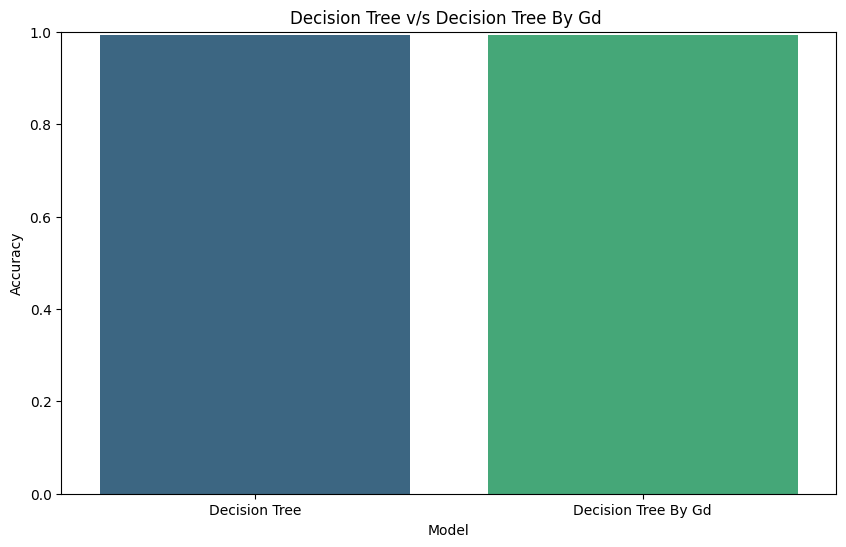

In [ ]:
import matplotlib.pyplot as plt



model_names = ['Decision Tree','Decision Tree By Gd']
accuracies = [dt1_accuracy,modelgd_accuracy]

# Plot accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Decision Tree v/s Decision Tree By Gd ')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()


**CONCLUSION :**

>>**For my dataset, Decision Tree ML model is better  **

In [ ]:
import pickle
pickle.dump(model,open('model2 .sav','wb'))

In [ ]:
import pickle
pickle.dump(sc,open('scalar2.sav','wb'))